In [29]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features = 1, random_state = 12, noise = 25)
X = 2**X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

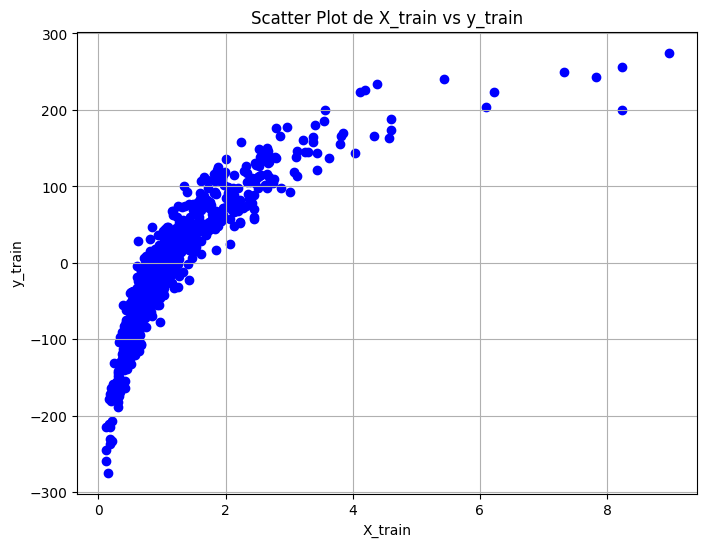

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', marker='o')
plt.title('Scatter Plot de X_train vs y_train')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import pandas as pd

# Função para identificar outliers
def detect_outliers(data):
    df = pd.DataFrame(data, columns=['data'])
    Q1 = df['data'].quantile(0.25)
    Q3 = df['data'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['data'] < lower_bound) | (df['data'] > upper_bound)]
    return outliers

# Identificando outliers para X_train
outliers_X_train = detect_outliers(X_train)
num_outliers_X_train = outliers_X_train.shape[0]

# Identificando outliers para y_train
outliers_y_train = detect_outliers(y_train)
num_outliers_y_train = outliers_y_train.shape[0]

print(f'Número de outliers em X_train: {num_outliers_X_train}')
print('Outliers em X_train:')
print(outliers_X_train)

print(f'\nNúmero de outliers em y_train: {num_outliers_y_train}')
print('Outliers em y_train:')
print(outliers_y_train)


Número de outliers em X_train: 30
Outliers em X_train:
         data
3    3.378496
41   3.431845
92   3.628267
95   3.224984
105  4.382749
121  7.319877
211  4.030954
252  3.291629
273  3.248930
275  8.234529
279  3.819055
288  4.112075
310  4.594254
315  8.232426
326  6.094439
331  3.552466
336  3.847674
364  3.373045
375  3.561139
433  8.979013
459  3.437075
464  4.573982
473  4.601497
576  4.329932
582  3.400793
596  5.430491
597  3.807513
611  4.197267
650  6.229196
667  7.828030

Número de outliers em y_train: 6
Outliers em y_train:
           data
121  249.535003
138 -274.299501
294 -259.612726
315  256.533695
433  274.734941
667  242.398722


In [4]:
import numpy as np
import pandas as pd


# Convertendo X_train em um DataFrame do pandas
df = pd.DataFrame(X_train, columns=['X_train'])

# Calculando os quartis e o IQR
Q1 = df['X_train'].quantile(0.25)
Q3 = df['X_train'].quantile(0.75)
IQR = Q3 - Q1

# Calculando os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['X_train'] < lower_bound) | (df['X_train'] > upper_bound)]

# Número de outliers
num_outliers = outliers.shape[0]

print(f'Número de outliers: {num_outliers}')
print('Outliers:')
print(outliers)


Número de outliers: 30
Outliers:
      X_train
3    3.378496
41   3.431845
92   3.628267
95   3.224984
105  4.382749
121  7.319877
211  4.030954
252  3.291629
273  3.248930
275  8.234529
279  3.819055
288  4.112075
310  4.594254
315  8.232426
326  6.094439
331  3.552466
336  3.847674
364  3.373045
375  3.561139
433  8.979013
459  3.437075
464  4.573982
473  4.601497
576  4.329932
582  3.400793
596  5.430491
597  3.807513
611  4.197267
650  6.229196
667  7.828030


In [6]:
# Função para identificar outliers e retornar índices
def detect_outliers_indices(data):
    df = pd.DataFrame(data, columns=['data'])
    Q1 = df['data'].quantile(0.25)
    Q3 = df['data'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df['data'] < lower_bound) | (df['data'] > upper_bound)].index
    return outlier_indices

# Identificando outliers para X_train
outliers_indices_X_train = detect_outliers_indices(X_train)

# Criando conjuntos de dados limpos removendo outliers
X_train_clean = [x for i, x in enumerate(X_train) if i not in outliers_indices_X_train]
y_train_clean = [y for i, y in enumerate(y_train) if i not in outliers_indices_X_train]  # Usa os índices de X_train

print(f'Número de outliers removidos: {len(outliers_indices_X_train)}')
print('Novo conjunto X_train sem outliers:')
print(X_train_clean)
print('Novo conjunto y_train sem outliers:')
print(y_train_clean)


Número de outliers removidos: 30
Novo conjunto X_train sem outliers:
[array([0.57938775]), array([0.609136]), array([1.05208559]), array([0.31678473]), array([1.0361651]), array([0.96579838]), array([1.42160699]), array([1.02533433]), array([0.11226548]), array([2.19854426]), array([0.57051224]), array([0.66912198]), array([0.48442521]), array([1.47575856]), array([0.33095415]), array([0.34652096]), array([2.68475581]), array([0.6740621]), array([0.63099585]), array([1.3874704]), array([2.03406128]), array([0.345146]), array([0.65806626]), array([0.44144292]), array([1.40098117]), array([0.86675168]), array([2.96871626]), array([1.1864009]), array([1.04900067]), array([0.30625979]), array([2.32012925]), array([0.95412357]), array([0.29027261]), array([2.43984415]), array([0.55006541]), array([0.78732177]), array([0.83930038]), array([1.56055209]), array([0.39057481]), array([1.16841034]), array([0.63623069]), array([0.28780679]), array([2.13858581]), array([0.4369547]), array([1.919411

In [16]:
# Função para identificar outliers e retornar índices
def detect_outliers_indices(data):
    df = pd.DataFrame(data, columns=['data'])
    Q1 = df['data'].quantile(0.25)
    Q3 = df['data'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df['data'] < lower_bound) | (df['data'] > upper_bound)].index
    return outlier_indices

# Identificando outliers para X_train
outliers_indices_X_test = detect_outliers_indices(X_test)

# Criando conjuntos de dados limpos removendo outliers
X_test_clean = [x for i, x in enumerate(X_test) if i not in outliers_indices_X_test]
y_test_clean = [y for i, y in enumerate(y_test) if i not in outliers_indices_X_test]  # Usa os índices de X_test

print(f'Número de outliers removidos: {len(outliers_indices_X_test)}')
print('Novo conjunto X_test sem outliers:')
print(X_test_clean)
print('Novo conjunto y_test sem outliers:')
print(y_test_clean)

Número de outliers removidos: 11
Novo conjunto X_test sem outliers:
[array([1.1904646]), array([0.6610583]), array([2.42588939]), array([0.60673063]), array([0.77553395]), array([0.66328645]), array([0.66971207]), array([0.61153486]), array([0.42374197]), array([0.97006156]), array([2.68103762]), array([0.60968828]), array([1.24477508]), array([1.27574107]), array([0.52268916]), array([0.66557074]), array([1.12113472]), array([0.80430572]), array([1.45993453]), array([0.80638697]), array([0.57901663]), array([0.86022091]), array([1.16129649]), array([1.3897262]), array([1.69266441]), array([0.93717399]), array([2.65314611]), array([1.26400524]), array([0.63972916]), array([0.45826978]), array([0.85570053]), array([0.76761519]), array([0.71260721]), array([2.30068045]), array([2.04033139]), array([1.1010242]), array([0.27949429]), array([0.92924935]), array([1.81258788]), array([2.44087534]), array([0.87347513]), array([1.43157798]), array([0.88221192]), array([1.09418164]), array([0.45

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Inicializando o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# Treinando o modelo
knn.fit(X_train_clean, y_train_clean)

# Prevendo os valores no conjunto de treino (sem outliers)
y_train_pred = knn.predict(X_train_clean)

# Calculando o erro quadrático médio no conjunto de treino
mse_train = mean_squared_error(y_train_clean, y_train_pred)

print(f'Erro Quadrático Médio no conjunto de treino (sem outliers): {mse_train:.4f}')

Erro Quadrático Médio no conjunto de treino (sem outliers): 496.4654


In [23]:
# Inicializando o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# Treinando o modelo com dados limpos
knn.fit(X_train_clean, y_train_clean)

# Fazendo previsões no conjunto de teste
y_test_pred = knn.predict(X_test)

# Calculando o erro quadrático médio no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Erro Quadrático Médio no conjunto de teste: {mse_test:.4f}')

Erro Quadrático Médio no conjunto de teste: 851.8078


In [11]:
# Inicializando o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Treinando o modelo
knn.fit(X_train_clean, y_train_clean)

# Prevendo os valores no conjunto de treino (sem outliers)
y_train_pred = knn.predict(X_train_clean)

# Calculando o erro quadrático médio no conjunto de treino
mse_train = mean_squared_error(y_train_clean, y_train_pred)

print(f'Erro Quadrático Médio no conjunto de treino (sem outliers): {mse_train:.4f}')

Erro Quadrático Médio no conjunto de treino (sem outliers): 0.0000


In [24]:
# Inicializando o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Treinando o modelo com dados limpos
knn.fit(X_train_clean, y_train_clean)

# Fazendo previsões no conjunto de teste
y_test_pred = knn.predict(X_test)

# Calculando o erro quadrático médio no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Erro Quadrático Médio no conjunto de teste: {mse_test:.4f}')

Erro Quadrático Médio no conjunto de teste: 950.3043


In [26]:
# Inicializando o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# Treinando o modelo com dados limpos
knn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_test_pred = knn.predict(X_test)

# Calculando o erro quadrático médio no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Erro Quadrático Médio no conjunto de teste: {mse_test:.4f}')

Erro Quadrático Médio no conjunto de teste: 759.7772


In [27]:
# Inicializando o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Treinando o modelo com dados limpos
knn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_test_pred = knn.predict(X_test)

# Calculando o erro quadrático médio no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Erro Quadrático Médio no conjunto de teste: {mse_test:.4f}')

Erro Quadrático Médio no conjunto de teste: 866.8674


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Definição do grid de hiperparâmetros
parametros = {'n_neighbors': range(1, 25), 'weights': ['uniform', 'distance']}

# Inicializando o modelo KNN
knn = KNeighborsRegressor()

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=parametros, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Realizando o treinamento do modelo
grid_search.fit(X_train, y_train)

# Encontrando o melhor número de vizinhos
best_params = grid_search.best_params_
best_n_neighbors = best_params['n_neighbors']

print(f'O melhor número de vizinhos encontrado: {best_n_neighbors}')


O melhor número de vizinhos encontrado: 16


In [31]:
# Encontrando o melhor parâmetro 'weights'
best_params = grid_search.best_params_
best_weights = best_params['weights']

print(f'O melhor valor para o parâmetro "weights" encontrado: {best_weights}')

O melhor valor para o parâmetro "weights" encontrado: uniform


In [32]:
# Encontrando o melhor modelo
best_model = grid_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_test_pred = best_model.predict(X_test)

# Calculando o erro quadrático médio no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Erro Quadrático Médio no conjunto de teste: {mse_test:.4f}')

Erro Quadrático Médio no conjunto de teste: 646.3674


In [33]:
# Importando as dependências
from sklearn.tree import DecisionTreeRegressor 
# Modelos de regressão
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from seaborn import heatmap, pairplot
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [34]:
# Setando uma semante aleatória para que exista replicabilidade
np.random.seed(0)
# Pegando dados do csv e armazenando num DataFrame
base_carros = pd.read_csv('CarPrice_Assignment.csv', index_col='car_ID')
# Filtrando colunas de interesse
lista_colunas = ['CarName','carlength','carwidth','carheight',
                'enginesize','curbweight','horsepower','price']
base_carros = base_carros.loc[:,lista_colunas].copy()
# Renomeando as colunas
dictNames = {'CarName':'nome',
            'carlength':'comprimento',
            'car width':'largura',
            'carheight':'altura',
            'enginesize':'tanque',
            'curbweight':'peso_bruto',
            'horsepower':'potencia',
            'price':'preco'}
base_carros = base_carros.rename(columns=dictNames)

In [35]:
# Contando o número de carros (linhas) no dataframe
num_carros = base_carros.shape[0]

print(f'O número total de carros na base de dados é: {num_carros}')

O número total de carros na base de dados é: 205


In [36]:
# Verificando quais colunas têm valores nulos
null_columns = base_carros.isnull().sum()

# Contando o número de colunas com valores nulos
num_columns_with_nulls = (null_columns > 0).sum()

print(f'O número de colunas com valores nulos é: {num_columns_with_nulls}')

O número de colunas com valores nulos é: 0


In [39]:
# Selecionando apenas as colunas numéricas
numerical_cols = base_carros.select_dtypes(include=['number'])

# Calculando a matriz de correlação
correlation_matrix = numerical_cols.corr()

# Encontrando as variáveis mais correlacionadas
# Encontrando o valor absoluto máximo de correlação para cada par de variáveis
# Ignorando a diagonal (correlação de 1 com si mesma)
max_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmax()
max_corr_value = correlation_matrix.loc[max_corr]

print(f'As variáveis mais correlacionadas são: {max_corr}')
print(f'O valor da correlação entre essas variáveis é: {max_corr_value:.4f}')

As variáveis mais correlacionadas são: ('comprimento', 'peso_bruto')
O valor da correlação entre essas variáveis é: 0.8777


In [40]:
# Encontrando as variáveis menos correlacionadas
# Encontrando o valor absoluto mínimo de correlação para cada par de variáveis
# Ignorando a diagonal (correlação de 1 com si mesma)
min_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmin()
min_corr_value = correlation_matrix.loc[min_corr]

print(f'As variáveis menos correlacionadas são: {min_corr}')
print(f'O valor da correlação entre essas variáveis é: {min_corr_value:.4f}')

As variáveis menos correlacionadas são: ('altura', 'potencia')
O valor da correlação entre essas variáveis é: -0.1088


In [69]:
# Exemplo de como a coluna 'preco' pode estar formatada
print(base_carros['preco'].head())

# Remover caracteres não numéricos (ex: símbolos de moeda, vírgulas)
base_carros['preco'] = base_carros['preco'].replace('[\$,]', '', regex=True)

# Converter a coluna para tipo numérico
base_carros['preco'] = pd.to_numeric(base_carros['preco'], errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(base_carros['preco'].dtypes)
print(base_carros['preco'].head())

car_ID
1    13495
2    16500
3    16500
4    13950
5    17450
Name: preco, dtype: object
float64
car_ID
1    13495.0
2    16500.0
3    16500.0
4    13950.0
5    17450.0
Name: preco, dtype: float64


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mari_\AppData\Local\Temp\ipykernel_12200\3522013390.py:5: SyntaxWarning: invalid escape sequence '\$'
  base_carros['preco'] = base_carros['preco'].replace('[\$,]', '', regex=True)


In [70]:
# Nome da variável alvo
target = 'preco'

# Selecionando apenas as colunas numéricas
numerical_cols = base_carros.select_dtypes(include=['number'])

# Remover a coluna alvo para cálculo de correlação
numerical_cols = numerical_cols.drop(columns=[target])

# Calculando a correlação entre a variável alvo e as outras variáveis
correlation_with_target = numerical_cols.corrwith(base_carros[target])

# Encontrando a variável mais correlacionada com a variável alvo
most_correlated_var = correlation_with_target.abs().idxmax()
most_correlated_value = correlation_with_target[most_correlated_var]

print(f'A variável mais correlacionada com a variável alvo ({target}) é: {most_correlated_var}')
print(f'O valor da correlação é: {most_correlated_value:.4f}')


A variável mais correlacionada com a variável alvo (preco) é: tanque
O valor da correlação é: 0.8746


In [67]:
# Encontrar a variável menos correlacionada com a variável alvo
least_correlated_var = correlation_with_target.abs().idxmin()
least_correlated_value = correlation_with_target[least_correlated_var]

print(f'A variável menos correlacionada com a variável alvo ({target}) é: {least_correlated_var}')
print(f'O valor da correlação é: {least_correlated_value:.4f}')

A variável menos correlacionada com a variável alvo (preco) é: altura
O valor da correlação é: 0.1216


In [60]:
# 1. Excluir a variável 'nome'
base_carros = base_carros.drop(columns=['nome'])

# 2. Separar variáveis preditoras e a variável alvo
# Variáveis preditoras
X = base_carros[['comprimento', 'carwidth', 'altura', 'tanque', 'peso_bruto', 'potencia']]

# Variável alvo
y = base_carros['preco']

# 3. Dividir os dados em treino e teste (80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar a forma dos conjuntos de dados
print(f'Forma de X_train: {X_train.shape}')
print(f'Forma de X_test: {X_test.shape}')
print(f'Forma de y_train: {y_train.shape}')
print(f'Forma de y_test: {y_test.shape}')


Forma de X_train: (164, 6)
Forma de X_test: (41, 6)
Forma de y_train: (164,)
Forma de y_test: (41,)


In [62]:
# Aqui está um exemplo para verificar e tratar valores NaN:

# Verificar valores NaN
print("Verificando valores NaN nos dados de treino e teste:")
print(f'Valores NaN em X_train: {np.sum(np.isnan(X_train))}')
print(f'Valores NaN em X_test: {np.sum(np.isnan(X_test))}')
print(f'Valores NaN em y_train: {np.sum(np.isnan(y_train))}')
print(f'Valores NaN em y_test: {np.sum(np.isnan(y_test))}')

# Tratar valores NaN (exemplo: substituir por 0 ou pela média)
# Você pode escolher a estratégia que faz mais sentido para seus dados

# Substituir NaN com 0 (não recomendado na maioria dos casos, apenas um exemplo)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(y_train.mean())  # Substituir NaN na variável alvo com a média
y_test = y_test.fillna(y_test.mean())      # Substituir NaN na variável alvo com a média

# Verificar se os valores NaN foram removidos
print("Verificando se valores NaN foram removidos:")
print(f'Valores NaN em X_train após tratamento: {np.sum(np.isnan(X_train))}')
print(f'Valores NaN em X_test após tratamento: {np.sum(np.isnan(X_test))}')
print(f'Valores NaN em y_train após tratamento: {np.sum(np.isnan(y_train))}')
print(f'Valores NaN em y_test após tratamento: {np.sum(np.isnan(y_test))}')

# Reajustar o modelo e calcular MSE
modelo = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=0)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Calcular MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE no conjunto de treino: {mse_train:.4f}')
print(f'MSE no conjunto de teste: {mse_test:.4f}')


Verificando valores NaN nos dados de treino e teste:
Valores NaN em X_train: comprimento    0
carwidth       0
altura         0
tanque         0
peso_bruto     0
potencia       0
dtype: int64
Valores NaN em X_test: comprimento    0
carwidth       0
altura         0
tanque         0
peso_bruto     0
potencia       0
dtype: int64
Valores NaN em y_train: 0
Valores NaN em y_test: 1
Verificando se valores NaN foram removidos:
Valores NaN em X_train após tratamento: comprimento    0
carwidth       0
altura         0
tanque         0
peso_bruto     0
potencia       0
dtype: int64
Valores NaN em X_test após tratamento: comprimento    0
carwidth       0
altura         0
tanque         0
peso_bruto     0
potencia       0
dtype: int64
Valores NaN em y_train após tratamento: 0
Valores NaN em y_test após tratamento: 0
MSE no conjunto de treino: 1696429.0518
MSE no conjunto de teste: 7860128.6413


c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\regressão não linear\myenv\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [72]:
# 1. Criar uma instância do modelo com os parâmetros especificados
modelo = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=0)

# 2. Ajustar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# 3. Fazer previsões com o modelo ajustado
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# 4. Avaliar o modelo com MSE (Erro Quadrático Médio)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE no conjunto de treino: {mse_train:.4f}')
print(f'MSE no conjunto de teste: {mse_test:.4f}')


MSE no conjunto de treino: 1696429.0518
MSE no conjunto de teste: 7860128.6413


In [71]:
# Setando uma semante aleatória para que exista replicabilidade
np.random.seed(0)
# Pegando dados do csv e armazenando num DataFrame
base_carros = pd.read_csv('CarPrice_Assignment.csv', index_col='car_ID')
# Filtrando colunas de interesse
lista_colunas = ['CarName','carlength','carwidth','carheight',
                'enginesize','curbweight','horsepower','price']
base_carros = base_carros.loc[:,lista_colunas].copy()
# Renomeando as colunas
dictNames = {'CarName':'nome',
            'carlength':'comprimento',
            'car width':'largura',
            'carheight':'altura',
            'enginesize':'tanque',
            'curbweight':'peso_bruto',
            'horsepower':'potencia',
            'price':'preco'}
base_carros = base_carros.rename(columns=dictNames)

In [73]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Supondo que X_train, X_test, y_train e y_test já estejam definidos e limpos de valores NaN

# Criar uma instância do modelo com os parâmetros especificados
modelo = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=0)

# Ajustar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões com o modelo ajustado
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Calcular o MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calcular o RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f'RMSE no conjunto de treino: {rmse_train:.4f}')
print(f'RMSE no conjunto de teste: {rmse_test:.4f}')


RMSE no conjunto de treino: 1302.4704
RMSE no conjunto de teste: 2803.5921
